In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
import pandas as pd

In [4]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
from src import day1, day2, day4, computer, day6, day7, day10, day11, day12, day13, day14

# Day 1
## Part 1

In [8]:
fuel = day1.compute_fuel_requirements('mass.csv')
print('Sum of the fuel requirements: {}'.format(fuel))

Sum of the fuel requirements: 3337766


## Part 2

In [9]:
fuel = day1.compute_all_fuel_requirements('mass.csv')
print('Sum of the fuel requirements, taking fuel mass into account: {}'.format(fuel))

Sum of the fuel requirements, taking fuel mass into account: 5003788


# Day 2
## Part 1

In [10]:
program = [1,0,0,3,1,1,2,3,1,3,4,3,1,5,0,3,2,1,6,19,1,9,19,23,2,23,10,27,1,27,5,31,1,31,6,35,1,6,35,39,2,39,13,43,1,9,43,47,2,9,47,51,1,51,6,55,2,55,10,59,1,59,5,63,2,10,63,67,2,9,67,71,1,71,5,75,2,10,75,79,1,79,6,83,2,10,83,87,1,5,87,91,2,9,91,95,1,95,5,99,1,99,2,103,1,103,13,0,99,2,14,0,0]

Restore the gravity assist program to the "1202 program alarm" state: replace position 1 with the value 12 and replace position 2 with the value 2.

In [11]:
program[1] = 12
program[2] = 2

In [13]:
result = day2.intcode_computer(program)

In [17]:
print('Value left at position 0: {}'.format(result[0]))

Value left at position 0: 3931283


## Part 2

In [18]:
program = [1,0,0,3,1,1,2,3,1,3,4,3,1,5,0,3,2,1,6,19,1,9,19,23,2,23,10,27,1,27,5,31,1,31,6,35,1,6,35,39,2,39,13,43,1,9,43,47,2,9,47,51,1,51,6,55,2,55,10,59,1,59,5,63,2,10,63,67,2,9,67,71,1,71,5,75,2,10,75,79,1,79,6,83,2,10,83,87,1,5,87,91,2,9,91,95,1,95,5,99,1,99,2,103,1,103,13,0,99,2,14,0,0]

In [19]:
output = 19690720
code = day2.get_error_code(output=output, program=program)
print('Code error: {}'.format(code))

Code error: 6979


# Day 3
This day can be run using "streamlit run app_day3", which will launch a streamlit application to get the solution.

# Day 4
## Part 1
Although it seems that there should be an explicit formula to solve this problem, it can be obtained by brute force, since the interval of the numbers is not very big.

In [5]:
n = day4.count_passwords((254032,789860))
print('Number of possible passwords: {}'.format(n))

Number of possible passwords: 1033


The idea to get the formula would be: _Starting with 52 and ending in 100. For the second digit there are 5 possibilities (from 5 to 9). And if the second digit is fixed, for the last digit there is only one possible value (5 now). So we will have 5 valid values (55, 66, 77, 88, 99)._

It might be possible to extend this reasoning to a general case, but it is not obvious how to know that the possible values are still under the upper threshold in an automatic way.

## Part 2

In [6]:
n = day4.count_passwords_part2((254032,789860))
print('Number of possible passwords: {}'.format(n))

Number of possible passwords: 670


# Day 5
## Part 1
The computer code has been modified to adapt it to day 7 part 2. The computer run the program in a dedicated thread, which waits for an input to be set. After the execution is finished, the output can be retrieved. 

In order to store the inputs and outputs two synchronized queues are used (which make it possible to connect several computers). These queues can be passed as argument when the computer is created. 

In [68]:
f = open('data/raw/day5/program.txt', 'r')
program = f.read()
program = list(map(int, program.split(',')))

Launch the program execution, which keeps waiting until an input is send.

In [24]:
pc = computer.intcode_computer(program)
pc.run_program()

Add a new input.

In [25]:
pc.set_input(1)

Get the output.

In [26]:
pc.get_output()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 5044655]

## Part 2

In [66]:
test = [3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99]
pc = computer.intcode_computer(test)
pc.set_input(2)
pc.run_program()
pc.get_output()

[999]

In [69]:
print('Diagnostic code for system ID 5:')
pc = computer.intcode_computer(program)
pc.set_input(5)
pc.run_program()
pc.get_output()

Diagnostic code for system ID 5:


[7408802]

# Day 6
## Part 1
This implementation is quite inefficient, since it uses Depth First Search on the tree, starting always with "COM". Then, the same path is computed a lot of different times for big graphs. It could be optimized moving also the starting point.

Test tree:

In [6]:
test_programs = ['COM)B', 'B)C', 'C)D', 'D)E', 'E)F', 'B)G', 'G)H', 'D)I', 'E)J', 'J)K', 'K)L']
g = day6.create_graph(orbits=test_orbits)
print('Number of orbits: {}'.format(day6.count_orbits(g)))

Number of orbits: 42


Challenge input:

In [10]:
g = day6.create_graph(orbits_path='orbits.txt',
                      root_path='data/raw/day6')
print('Number of orbits: {}'.format(day6.count_orbits(g)))

Number of orbits: 234446


## Part 2
Now we have to create an undirected graph to represent the orbits, in order to be able to go back in the orbital path.

Test graph:

In [12]:
test_orbits = ['COM)B', 'B)C', 'C)D', 'D)E', 'E)F', 'B)G', 'G)H', 'D)I', 'E)J', 'J)K', 'K)L', 'K)YOU', 'I)SAN']
g = day6.create_graph(orbits=test_orbits, directed=False)
print('Number of transfers: {}'.format(day6.count_transfers(g)))

Number of transfers: 4


Using test input:

In [19]:
g = day6.create_graph(orbits_path='orbits.txt',
                      root_path='data/raw/day6',
                      directed=False
                     )
print('Number of transfers: {}'.format(day6.count_transfers(g)))

Number of transfers: 385


# Day 7
## Part 1
Test programs:

In [62]:
test_program = '3,15,3,16,1002,16,10,16,1,16,15,15,4,15,99,0,0' #Solution: 43210 - 4,3,2,1,0
# test_program = '3,23,3,24,1002,24,10,24,1002,23,-1,23,101,5,23,23,1,24,23,23,4,23,99,0,0' #Solution: 54321 - 0,1,2,3,4
# test_program = '3,31,3,32,1002,32,10,32,1001,31,-2,31,1007,31,0,33,1002,33,7,33,1,33,31,31,1,32,31,31,4,31,99,0,0,0' #Solution: 65210 - 1,0,4,3,2

max_phase = day7.highest_amplification_signal(program=test_program,
                                              sequence_signals=[0,1,2,3,4])
print('Max thruster signal {m} (from phase setting sequence {p})'.format(m=max_phase[1],
                                                                         p=max_phase[0]))

Testing 120 phase settings
Max thruster signal 43210 (from phase setting sequence (4, 3, 2, 1, 0))


Challenge input:

In [63]:
max_phase = day7.highest_amplification_signal(program_path='program.txt',
                                              root_path='data/raw/day7',
                                              sequence_signals=[0,1,2,3,4])
print('Max thruster signal {m} (from phase setting sequence {p})'.format(m=max_phase[1],
                                                                         p=max_phase[0]))

Testing 120 phase settings
Max thruster signal 368584 (from phase setting sequence (2, 4, 0, 1, 3))


## Part 2
Test programs:

In [64]:
# test_program = '3,26,1001,26,-4,26,3,27,1002,27,2,27,1,27,26,27,4,27,1001,28,-1,28,1005,28,6,99,0,0,5' #Solution: 139629729 - 9,8,7,6,5
test_program = '3,52,1001,52,-5,52,3,53,1,52,56,54,1007,54,5,55,1005,55,26,1001,54,-5,54,1105,1,12,1,53,54,53,1008,54,0,55,1001,55,1,55,2,53,55,53,4,53,1001,56,-1,56,1005,56,6,99,0,0,0,0,10' #Solution: 18216 - 9,7,8,5,6

max_phase = day7.highest_amplification_signal(program=test_program,
                                              sequence_signals=[5,6,7,8,9],
                                              feedback_loop=True
                                             )
print('Max thruster signal {m} (from phase setting sequence {p})'.format(m=max_phase[1],
                                                                         p=max_phase[0]))

Testing 120 phase settings
Max thruster signal 18216 (from phase setting sequence (9, 7, 8, 5, 6))


Challenge input:

In [65]:
max_phase = day7.highest_amplification_signal(program_path='program.txt',
                                              root_path='data/raw/day7',
                                              sequence_signals=[5,6,7,8,9],
                                              feedback_loop=True
                                             )
print('Max thruster signal {m} (from phase setting sequence {p})'.format(m=max_phase[1],
                                                                         p=max_phase[0]))

Testing 120 phase settings
Max thruster signal 35993240 (from phase setting sequence (5, 7, 8, 9, 6))


# Day 9
## Part 1
Test programs:

In [71]:
test_program = [109,1,204,-1,1001,100,1,100,1008,100,16,101,1006,101,0,99] #Solution: Itself
# test_program = [1102,34915192,34915192,7,4,7,99] #Solution: 16 digits int
# test_program = [104,1125899906842624,99] #Solution: Integer in the middle

pc = computer.intcode_computer(test_program)
pc.run_program()
pc.get_output()

[109, 1, 204, -1, 1001, 100, 1, 100, 1008, 100, 16, 101, 1006, 101, 0, 99]

Challenge input:

In [72]:
f = open('data/raw/day1/program.txt', 'r')
program = f.read()
program = list(map(int, program.split(',')))

In [73]:
pc = computer.intcode_computer(program, test_mode=False)
pc.set_input(1)
pc.run_program()
pc.get_output()

[2745604242]

### Part 2
It is the same as part 1 but just changing the input value.

In [74]:
pc.start_computer()
pc.set_input(2)
pc.run_program()
pc.get_output()

[51135]

## Day 10
### Part 1

282 detected asteroids from optimal position (22, 19)


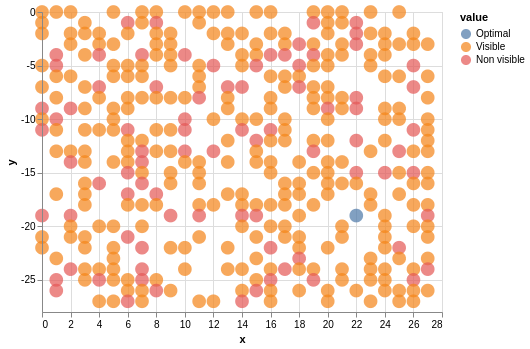

In [30]:
# Test maps
# map_file = 'map_test1.txt' # Solution: 8, (3,4)
# map_file = 'map_test2.txt' # Solution: 33, (5,8)
# map_file = 'map_test3.txt' # Solution: 35, (1,2)
# map_file = 'map_test4.txt' # Solution: 41, (6,3)
# map_file = 'map_test5.txt' # Solution: 210, (11,13)

# Challenge input
map_file = 'map.txt'

asteroids = day10.read_asteroid_map(map_path=map_file, root_path = 'data/raw/day10')
detected = day10.count_optimal_detected(asteroids)
print('{n} detected asteroids from optimal position {p}'.format(n=detected[1], p=detected[0]))

### Part 2

In [5]:
# Test maps
# map_file = 'map_test6.txt'; station = (8,3); n = None
# map_file = 'map_test5.txt'; station = (11,13); n = 200

# Challenge input
map_file = 'map.txt'; station = (22, 19); n = 200

asteroids = day10.read_asteroid_map(map_path=map_file, root_path = 'data/raw/day10')
vaporized = day10.vaporize_asteroids(asteroids, location=station, n_asteroids=n)
print('{n}th asteroid to be vaporized: {p}'.format(n=n, p=vaporized[-1]))

200th asteroid to be vaporized: (10, 8)


In [6]:
vap200 = vaporized[-1]
print('Multiply X coordinate by 100 and then add Y coordinate: {}'.format(100*vap200[0]+vap200[1]))

Multiply X coordinate by 100 and then add Y coordinate: 1008


Animation of vaporized asteroids:

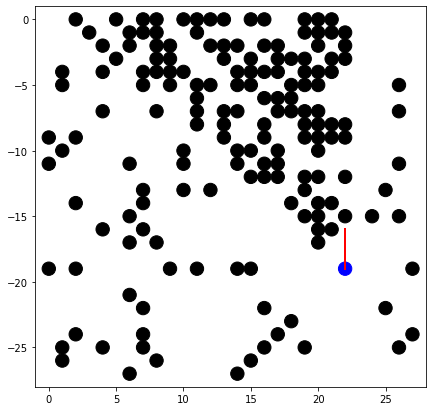

In [29]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['animation.writer'] = 'ffmpeg' # Needs to be intalled in the system!
matplotlib.rc('animation', html='html5')
anim = day10.animated_vaporization(asteroids, station, vaporized)
anim

# Day 11
## Part 1
Get painting robot positions.

In [7]:
f = open('data/raw/day11/program.txt', 'r')
program = f.read()
program = list(map(int, program.split(',')))

In [22]:
paintings = day11.get_painted_positions(program)
print('Panels painted at least once: {}'.format(len(paintings.keys())))

Panels painted at least once: 2511


## Part 2

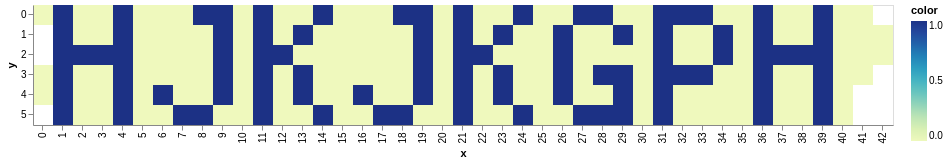

In [24]:
day11.paint_registration_id(program)

# Day 12
## Part 1
Initial positions:
- x=-2, y=9, z=-5
- x=16, y=19, z=9
- x=0, y=3, z=6
- x=11, y=0, z=11

In [12]:
positions = pd.DataFrame({'x': [-2, 16, 0, 11],
                          'y': [9, 19, 3, 0],
                          'z': [-5, 9, 6, 11]})

In [13]:
n = 1000
energy = day12.compute_system_energy(positions, steps=n)
print(f'Total energy in the system after {n} steps: {energy}')

Total energy in the system after 1000 steps: 12053


Let's see how the moons move around using an interactive plot.

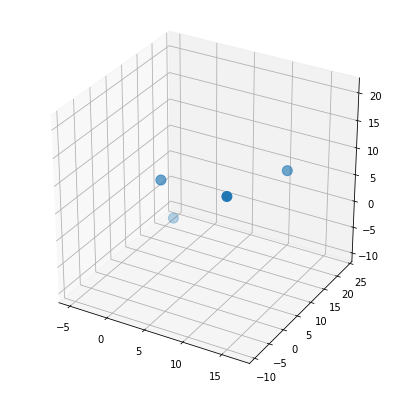

In [44]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['animation.writer'] = 'ffmpeg' # Needs to be intalled in the system!
matplotlib.rc('animation', html='html5')
day12.animate_system(positions, steps=100)

## Part 2
Test example:

In [57]:
positions = pd.DataFrame({'x': [-1, 2, 4, 3],
                          'y': [0, -10, -8, 5],
                          'z': [2, -7, 8, -1]})

In [58]:
cicle = day12.cicle_length(positions)
print(f'Number of steps until the first repetition: {cicle}')

Dimension: x
Dimension: y
Dimension: z
Number of steps until the first repetition: 2772


Second example:

In [60]:
positions = pd.DataFrame({'x': [-8, 5, 2, 9],
                          'y': [-10, 5, -7, -8],
                          'z': [0, 10, 3, -3]})
cicle = day12.cicle_length(positions)
print(f'Number of steps until the first repetition: {cicle}')

Dimension: x
1000
2000
Dimension: y
1000
2000
3000
4000
5000
Dimension: z
1000
2000
3000
4000
Number of steps until the first repetition: 4686774924


Challenge input:

In [61]:
positions = pd.DataFrame({'x': [-2, 16, 0, 11],
                          'y': [9, 19, 3, 0],
                          'z': [-5, 9, 6, 11]})

In [62]:
cicle = day12.cicle_length(positions)
print(f'Number of steps until the first repetition: {cicle}')

Dimension: x
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157

# Day 13
## Part 1

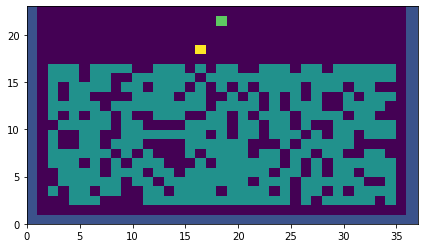

In [7]:
arcade = day13.ArcadeCabinet(program_path='program.txt',
                             root_path='data/raw/day13')
arcade.start_game()

In [8]:
n_blocks = arcade.count_tiles('block')
print(f'{n_blocks} block tiles')

344 block tiles


## Part 2
This part should be run from the Ubuntu terminal, using: <br>
_python_ <br>
_>>> from src import day13_ <br>
_>>> day13.play_arcade()_

The game has an auto-play mode, in which the machine plays automatically: <br>
_>>> day13.play_arcade(autoplay=True)_

If you want to see just the final score without showing the game screen, you can use:<br>
_>>> day13.play_arcade(autoplay=True, print_screen=False)_

# Day 14
## Part 1

In [17]:
import networkx as nx
def read_reactions(file: str):
    f = open(f'data/raw/day14/{file}', 'r')
    reactions = f.readlines()
    return [" ".join(r.split()) for r in reactions]

In [99]:
# file = 'test1.txt' #31 ORE
# file = 'test2.txt' #165 ORE
# file = 'test3.txt' #13312 ORE
# file = 'test4.txt' #180697 ORE
# file = 'test5.txt' #2210736 ORE
file = 'input.txt'
reactions = read_reactions(file)
G = day14.construct_tree(reactions)

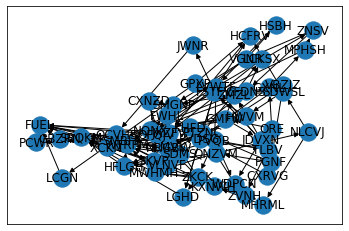

In [101]:
nx.draw_networkx(G)

In [100]:
ore = day14.DFS_ORE(G)
print(f'{ore} ORE required to produce 1 FUEL')

261960 ORE required to produce 1 FUEL
